In [1]:
# pip install ipykernel
# python -m ipykernel install --user --name=myenv --display-name "Python (myenv)"
# jupyter notebook


In [2]:
import tensorflow as tf
print(tf.__version__)


2025-03-07 17:10:33.749100: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-07 17:10:33.877127: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741347633.936220    7595 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741347633.949189    7595 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07 17:10:34.088711: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

2.18.0


In [3]:
# !pip install matplotlib
# !pip install pandas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## handle categorical_data

In [4]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]


In [6]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
## feature Engineering 
#one hot encoding
pd.get_dummies(x['Geography'])

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [9]:
geography=pd.get_dummies(x['Geography'],drop_first=True) # conclude by reducing 1 col
gender=pd.get_dummies(x['Gender'],drop_first=True)
# print(gender)

In [10]:
x=x.drop(['Geography','Gender'],axis=1)

In [11]:
x.head() #observe the Geography Gender they deleted.........

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [12]:
x=pd.concat([x,geography,gender],axis=1) #handled caterogiral data

#axis=1 implies by colum wise


In [13]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [14]:
min_samples = min(len(x), len(y))
x = x[:min_samples]
y = y[:min_samples]


In [15]:
#spliting dataset into Training set and Test set
# !pip install scikit-learn

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_te st = train_test_split(x, y, test_size=0.2, random_state=0)


In [16]:
#feature scalling

# StandardScaler is a preprocessing technique from the sklearn.preprocessing module.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [17]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [18]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [19]:
x_train.shape

(8000, 11)

In [20]:
#creating ANN 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, ReLU, PReLU, ELU


In [21]:
#initialize ANN
classifier=Sequential()


In [22]:
#Assing input layers
classifier.add(Dense(units=11,activation='relu'))

In [23]:
#adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [24]:
# adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [25]:
#adding output Layer
classifier.add(Dense(1,activation='sigmoid'))

In [26]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

2025-03-07 17:10:38.026021: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [27]:
#Early stopping
import tensorflow as tf

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [28]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7285 - loss: 0.5356 - val_accuracy: 0.7967 - val_loss: 0.4537
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7929 - loss: 0.4417 - val_accuracy: 0.7955 - val_loss: 0.4451
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7994 - loss: 0.4316 - val_accuracy: 0.7963 - val_loss: 0.4408
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8094 - loss: 0.4158 - val_accuracy: 0.7997 - val_loss: 0.4355
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8074 - loss: 0.4218 - val_accuracy: 0.7997 - val_loss: 0.4286
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8080 - loss: 0.4086 - val_accuracy: 0.8058 - val_loss: 0.4177
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7993 - loss: 0.4068 - val_accuracy: 0.8148 - val_loss: 0.4017
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8293 - loss: 0.3705 - val_accu

In [29]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

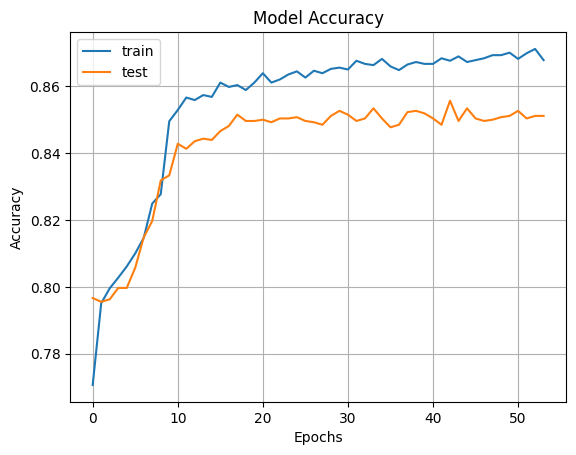

In [30]:
import matplotlib.pyplot as plt

# Assuming your model history object is called `history`

# Plotting Accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.grid(True)
plt.show()


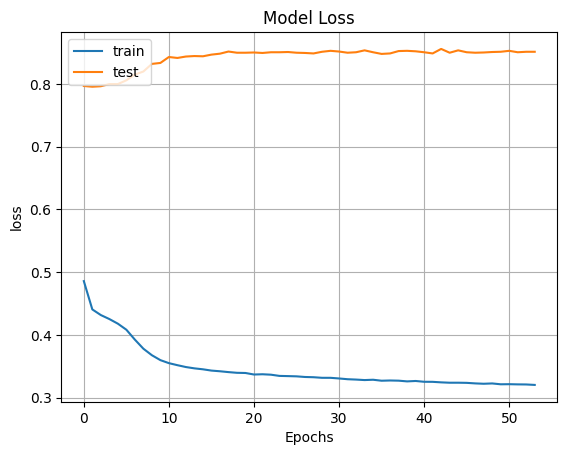

In [31]:
import matplotlib.pyplot as plt


# Plotting Loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.grid(True)
plt.show()


# Making predictions

In [50]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [54]:
#confusion mat

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1511,   84],
       [ 195,  210]])

In [55]:
#cal accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [56]:
score

0.8605

In [59]:
#get weights
classifier.get_weights()

[array([[ 0.06964142,  0.01865884,  0.12155548, -0.37266213,  0.07527269,
          0.29836753,  0.00958646, -0.1640597 ,  0.04347428,  0.5183407 ,
          0.21611202],
        [-0.2670202 , -0.48552862, -0.7743175 ,  0.39655432, -0.01031113,
         -0.02601887, -0.72068393,  0.36494726,  0.40303516, -0.35935077,
          0.5021843 ],
        [-0.14583279,  0.0059077 ,  0.14958164,  0.07982276,  0.17339335,
         -0.18425354,  0.0331594 ,  0.3179229 , -0.06224057,  0.40687013,
          0.09658091],
        [ 0.22848243,  0.07639537,  0.14935477, -0.7158527 ,  0.09789044,
          0.5509465 ,  0.167945  , -0.44788364,  0.13989805, -0.4827817 ,
          0.47204414],
        [ 0.69663244,  0.4148585 ,  0.27064145,  0.8611623 ,  0.8608207 ,
         -0.00654081,  0.44690016, -0.5892983 , -0.19896664,  0.37989452,
          0.73373145],
        [-0.08118969,  0.04003624,  0.17386143,  0.20099714, -0.03374742,
          0.15452407,  0.13204573,  0.1436903 ,  0.06102374, -0.4191689